# Germany IT Salary Survey Data Analysis(2019-2021)
#### An anonymous salary survey has been conducted annually since 2015 among European IT specialists with a stronger focus on Germany.

### Import Libraries

In [7]:
! pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=616f1fa451f8ec22ccd24ba43d270aaa665b2f9072704d2099d0dbd98b9bd34d
  Stored in directory: c:\users\user 1\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [2]:
import numpy as np
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy

### Data Extraction

In [3]:

#The first dataset of data salary survey from 2019
salary1 = 'IT Data Salary EU 2019.csv' 

In [4]:
#The second dataset of data salary survey from 2020
salary2 ='IT Data Salary EU 2020.csv'

In [5]:
#The second dataset of data salary survey from 2021
salary3 = 'IT Data Salary EU 2021.csv'

In [6]:
#Passing the datasets into a dataframe
df= pd.read_csv(salary1)
df2=pd.read_csv(salary2)
df3=pd.read_csv(salary3)

### Viewing the data.

In [7]:
df.head()

,Timestamp,Age,Gender,City,Seniority level,Position,Years of Experience,Your main technology / programming language,Salary,Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Language,Company name,Company size,Company type,Contract duration,Company business sector,0
0,02.12.2019 11:18:26,33,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29,Male,Berlin,Middle,Backend Developer,3,Python,55000,NaN,...,NaN,22.0,4.0,English,NaN,Oct-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,29,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30,Male,Berlin,Senior,Backend Developer,6,PHP,63000,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [8]:
df2.head()

,Timestamp,Age,Gender,City,Position,Years of Experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Salary,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Contract duration,Language,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,...,10000,30,Full-time employee,unlimited,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,...,5000,28,Full-time employee,unlimited,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,...,100000,30,Self-employed (freelancer),unlimited,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,...,NaN,24,Full-time employee,unlimited,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,...,NaN,29,Full-time employee,unlimited,English,101-1000,Product,No,NaN,NaN


In [9]:
df3.head()

,Age,Gender,City,Position,Years of Experience,Seniority level,Contract duration,Language,Size,Timestamp,Unnamed: 10,Salary
0,33,Male,Berlin,Backend Developer,8.0,Lead,unlimited,English,101-1000,02.12.2021 11:18:26,NaN,64000.0
1,44,Male,Berlin,Other,15.0,Lead,unlimited,English,Nov-50,02.12.2021 11:18:26,NaN,55000.0
2,28,Male,Berlin,ML Engineer,5.0,Middle,unlimited,English,up to 10,02.12.2021 11:18:26,NaN,70000.0
3,34,Female,Berlin,Other,10.0,Senior,unlimited,German,up to 10,02.12.2021 11:18:26,NaN,63000.0
4,26,Male,Munich,Software Engineer,5.0,Senior,unlimited,English,51-100,02.12.2021 11:18:26,NaN,66000.0


In [10]:
### Joining the data.
data= pd.concat([df,df2,df3])

In [11]:
data.head()

,Timestamp,Age,Gender,City,Seniority level,Position,Years of Experience,Your main technology / programming language,Salary,Yearly bonus,...,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Employment status,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Size,Unnamed: 10
0,02.12.2019 11:18:26,33,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02.12.2019 11:18:35,29,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02.12.2019 11:18:56,29,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02.12.2019 11:19:08,30,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02.12.2019 11:19:37,32,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
##Getting the required columns for analysis
dataset = deepcopy(data[['Timestamp','Gender','Age','Position','Seniority level','City','Contract duration','Years of Experience','Language','Salary']])

In [13]:
#Viewing the data.
dataset.head()

,Timestamp,Gender,Age,Position,Seniority level,City,Contract duration,Years of Experience,Language,Salary
0,02.12.2019 11:18:26,Male,33,Fullstack Developer,Senior,Berlin,unlimited,13,English,64000.0
1,02.12.2019 11:18:35,Male,29,Backend Developer,Middle,Berlin,unlimited,3,English,55000.0
2,02.12.2019 11:18:56,Male,29,Mobile Developer,Middle,Berlin,unlimited,4,English,70000.0
3,02.12.2019 11:19:08,Male,30,Backend Developer,Senior,Berlin,unlimited,6,English,63000.0
4,02.12.2019 11:19:37,Male,32,Embedded Developer,Senior,Berlin,unlimited,10,English,66000.0


### Data Cleaning.

In [14]:
##Checking the datatypes.
dataset.dtypes

Timestamp               object
Gender                  object
Age                      int64
Position                object
Seniority level         object
City                    object
Contract duration       object
Years of Experience     object
Language                object
Salary                 float64
dtype: object

In [15]:
##Concise Summary.
dataset.shape

(3197, 10)

In [16]:
##Removing commas in numerical data.
dataset = dataset.replace(',','',regex=True)

In [17]:
##Checking the columns.
dataset.columns

Index(['Timestamp', 'Gender', 'Age', 'Position', 'Seniority level', 'City',
       'Contract duration', 'Years of Experience', 'Language', 'Salary'],
      dtype='object')

In [18]:
##Converting the date and time  to datetime datatype.
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])

### Data Analysis

In [19]:
##Extracting the year in the timestamp.
dataset['Year']= dataset['Timestamp'].dt.year

In [20]:
dataset.head()

,Timestamp,Gender,Age,Position,Seniority level,City,Contract duration,Years of Experience,Language,Salary,Year
0,2019-02-12 11:18:26,Male,33,Fullstack Developer,Senior,Berlin,unlimited,13,English,64000.0,2019
1,2019-02-12 11:18:35,Male,29,Backend Developer,Middle,Berlin,unlimited,3,English,55000.0,2019
2,2019-02-12 11:18:56,Male,29,Mobile Developer,Middle,Berlin,unlimited,4,English,70000.0,2019
3,2019-02-12 11:19:08,Male,30,Backend Developer,Senior,Berlin,unlimited,6,English,63000.0,2019
4,2019-02-12 11:19:37,Male,32,Embedded Developer,Senior,Berlin,unlimited,10,English,66000.0,2019


In [21]:
### using SQL data to get insights.
##The least salary per annum of an IT personnel.
q = """
    SELECT Year,Gender,Position,MIN(Salary)
    FROM dataset
    """

In [22]:
##Printing the results.
print(sqldf(q,locals()))

   Year Gender          Position  MIN(Salary)
0  2019   Male  Mobile Developer       6000.0


In [23]:
##The least salary per annum of an IT personnel.
q1 = """
    SELECT Year,Gender,Position,MAX(Salary)
    FROM dataset
    """

In [24]:
##Printing the results.
print(sqldf(q1,locals()))

   Year Gender           Position  MAX(Salary)
0  2020   Male  Software Engineer     850000.0


In [25]:
#The frequency of the various genders in the IT industry.
gender_count = dataset['Gender'].describe()

In [26]:
gender_count

count     3195
unique       2
top       Male
freq      2702
Name: Gender, dtype: object

In [27]:
##The position with the highest personnel in IT.
position_freq = dataset['Position'].describe()

In [28]:
position_freq

count                  3193
unique                  168
top       Software Engineer
freq                    698
Name: Position, dtype: object

In [29]:
## Top three highest paid tech salary from 2019-2021.
mysql = lambda q:sqldf(q,globals())
q3 ="""
    SELECT Year,Gender,Position,Salary
    FROM dataset
    ORDER BY Salary DESC;
    """

In [30]:
##Printing the results.
mysql(q3).head(3)

,Year,Gender,Position,Salary
0,2020,Male,Software Engineer,850000.0
1,2020,Male,DevOps,300000.0
2,2020,Male,Software Engineer,250000.0


In [31]:
#The frequency of the various cities in the IT industry.
city_count = dataset['City'].describe()

In [32]:
city_count

count       3197
unique       137
top       Berlin
freq        1667
Name: City, dtype: object

In [33]:
#The city with the least frequency of IT personnel.
city_count1= dataset['City'].min()

In [34]:
city_count1

'Aachen'

In [35]:
#The frequency of the various contract duration in the IT industry.
contract_count = dataset['Contract duration'].describe()

In [36]:
contract_count

count          3191
unique            6
top       unlimited
freq           3005
Name: Contract duration, dtype: object

In [37]:
##The oldest techies in the IT industry.
q4 ="""
    SELECT Age,Gender,Position,Salary
    FROM dataset
    ORDER BY Age DESC;
    """

In [38]:
mysql(q4).head(5)

,Age,Gender,Position,Salary
0,69,Male,Product Analyst,70000.0
1,66,Male,Software Engineer,70000.0
2,66,Male,Software Engineer,76000.0
3,65,Male,Software Engineer,55000.0
4,65,Male,Software Engineer,67000.0


In [39]:
##The youngest techies in the IT industry.
q5 ="""
    SELECT Age,Gender,Position,City,Salary
    FROM dataset
    ORDER BY Age ASC;
    """

In [40]:
mysql(q5).head(5)

,Age,Gender,Position,City,Salary
0,20,Male,Machine Learning Engineer,Kyiv,14400.0
1,20,Male,QA Engineer,Berlin,240000.0
2,21,Male,Data Scientist,Moscow,28300.0
3,21,Male,Mobile Developer,Nizhny Novgorod,6000.0
4,21,Male,Backend Developer,Saint-Petersburg,15600.0


In [41]:
##The language most known in IT.
language_freq = dataset['Language'].describe()

In [42]:
language_freq

count        3195
unique         16
top       English
freq         2605
Name: Language, dtype: object

In [43]:
##The number 0f people with age range from 20-30 in IT.
q6 ="""
    SELECT Age
    FROM dataset
    WHERE Age <=30
    """

In [44]:
mysql(q6).describe()

,Age
count,1263.000000
mean,27.607284
std,2.110500
min,20.000000
25%,26.000000
50%,28.000000
75%,29.000000
max,30.000000


In [45]:
##The number 0f people with age range from 31-40 in IT.
q7 ="""
    SELECT Age
    FROM dataset
    WHERE Age > 30 AND Age <=40
    """

In [46]:
mysql(q7).describe()

,Age
count,1692.000000
mean,34.420213
std,2.575211
min,31.000000
25%,32.000000
50%,34.000000
75%,36.000000
max,40.000000


In [47]:
##The number 0f people with age range from 41 and above in IT.
q8 ="""
    SELECT Age
    FROM dataset
    WHERE Age > 40; 
    """

In [48]:
mysql(q8).describe()

,Age
count,242.000000
mean,44.995868
std,4.717319
min,41.000000
25%,42.000000
50%,44.000000
75%,46.000000
max,69.000000


In [49]:
##The frequency of people earning 50k and below per annum in IT.
q9 ="""
    SELECT Salary
    FROM dataset
    WHERE Salary <= 50000.0; 
    """

In [50]:
mysql(q9).describe()

,Salary
count,406.000000
mean,40055.854680
std,10299.108939
min,6000.000000
25%,35000.000000
50%,45000.000000
75%,48000.000000
max,50000.000000


In [51]:
##The frequency of people earning above 50k per annum in IT.
query ="""
    SELECT Salary
    FROM dataset
    WHERE Salary > 50000.0; 
    """

In [52]:
mysql(query).describe()

,Salary
count,2790.000000
mean,76887.352018
std,26323.734063
min,50400.000000
25%,63000.000000
50%,71000.000000
75%,83000.000000
max,850000.000000


In [53]:
##The IT job least done by personnel.
query1 ="""
    SELECT Gender,Age,MIN(Position),Salary
    FROM dataset 
    """

In [54]:
mysql(query1)

,Gender,Age,MIN(Position),Salary
0,Male,29,AI Management,55200.0


### Data Visualization

<AxesSubplot:title={'center':'The frequency of the gender in the IT Industry'}, xlabel='Gender', ylabel='count'>

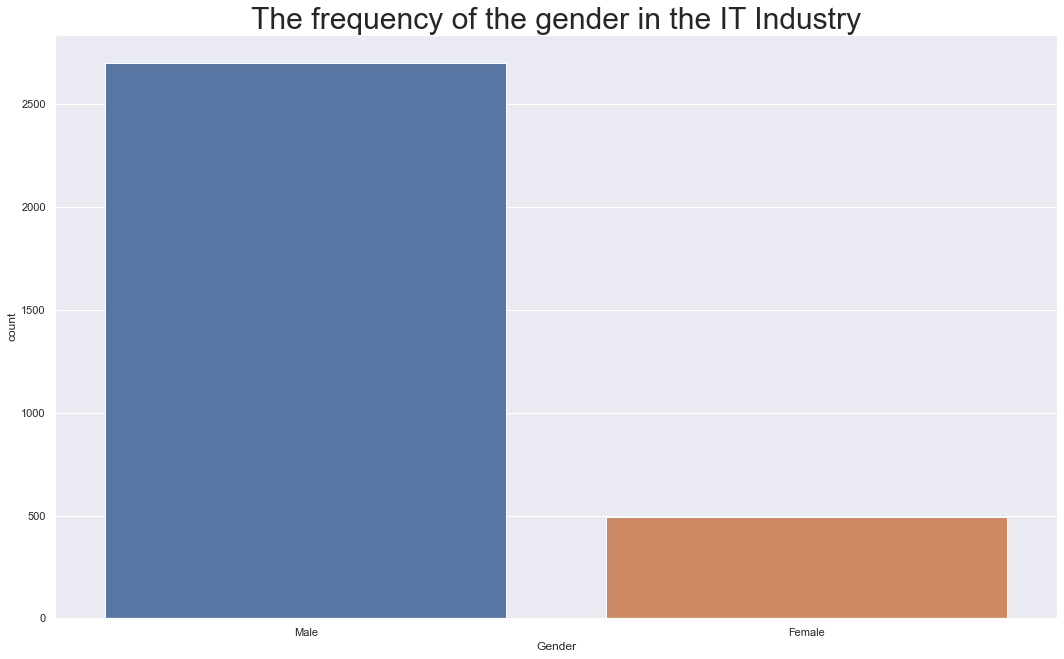

In [55]:
sns.set(rc={'figure.figsize':(16,10)})
plt.title ("The frequency of the gender in the IT Industry", fontsize=30)
sns.countplot('Gender',data=dataset)

## Oher Visualizations are in the Tableau Worksheet